<a href="https://colab.research.google.com/github/roshank1605A04/Ads-Optimization/blob/master/Ads_Optimization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

In [0]:
data = pd.read_csv('drive/My Drive/super/Reinforcement Learning/Ads_CTR_Optimisation.csv')

data.shape

(10000, 10)

In [0]:
data.head()

,Ad 1,Ad 2,Ad 3,Ad 4,Ad 5,Ad 6,Ad 7,Ad 8,Ad 9,Ad 10
0,1,0,0,0,1,0,0,0,1,0
1,0,0,0,0,0,0,0,0,1,0
2,0,0,0,0,0,0,0,0,0,0
3,0,1,0,0,0,0,0,1,0,0
4,0,0,0,0,0,0,0,0,0,0


In [0]:
data.describe()

,Ad 1,Ad 2,Ad 3,Ad 4,Ad 5,Ad 6,Ad 7,Ad 8,Ad 9,Ad 10
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000
mean,0.170300,0.129500,0.072800,0.119600,0.269500,0.012600,0.111200,0.209100,0.095200,0.04890
std,0.375915,0.335769,0.259821,0.324509,0.443722,0.111546,0.314395,0.406686,0.293506,0.21567
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
75%,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.00000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000


In [0]:
data.isnull().any().any()

False

In [0]:
data['Ad 1'].value_counts()

0    8297
1    1703
Name: Ad 1, dtype: int64

In [0]:
data['Ad 2'].value_counts()

0    8705
1    1295
Name: Ad 2, dtype: int64

In [0]:
data['Ad 3'].value_counts()

0    9272
1     728
Name: Ad 3, dtype: int64

In [0]:
data['Ad 4'].value_counts()

0    8804
1    1196
Name: Ad 4, dtype: int64

In [0]:
data['Ad 5'].value_counts()

0    7305
1    2695
Name: Ad 5, dtype: int64

In [0]:
data['Ad 6'].value_counts()

0    9874
1     126
Name: Ad 6, dtype: int64

In [0]:
data['Ad 7'].value_counts()

0    8888
1    1112
Name: Ad 7, dtype: int64

In [0]:
data['Ad 8'].value_counts()

0    7909
1    2091
Name: Ad 8, dtype: int64

In [0]:
data['Ad 9'].value_counts()

0    9048
1     952
Name: Ad 9, dtype: int64

In [0]:
data['Ad 10'].value_counts()

0    9511
1     489
Name: Ad 10, dtype: int64

In [0]:
# Implementing UCB

import math

N = 10000
d = 10

ads_selected = []
numbers_of_selections = [0] * d
sums_of_rewards = [0] * d
total_reward = 0

for n in range(0, N):
    ad = 0
    max_upper_bound = 0
    for i in range(0, d):
        if (numbers_of_selections[i] > 0):
            average_reward = sums_of_rewards[i] / numbers_of_selections[i]
            delta_i = math.sqrt(3/2 * math.log(n + 1) / numbers_of_selections[i])
            upper_bound = average_reward + delta_i
        else:
            upper_bound = 1e400
        if upper_bound > max_upper_bound:
            max_upper_bound = upper_bound
            ad = i
    ads_selected.append(ad)
    numbers_of_selections[ad] = numbers_of_selections[ad] + 1
    reward = data.values[n, ad]
    sums_of_rewards[ad] = sums_of_rewards[ad] + reward
    total_reward = total_reward + reward
    
    
    

Text(0,0.5,'Number of times each ad was selected')

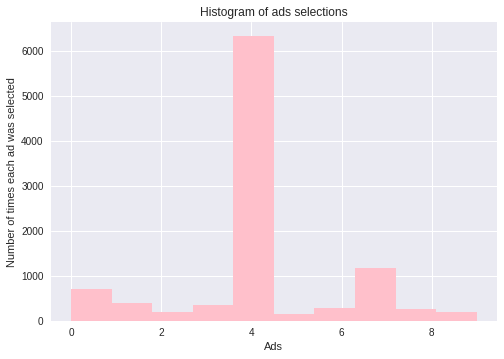

In [0]:
# Visualising the results

plt.hist(ads_selected, color = 'pink')
plt.title('Histogram of ads selections')
plt.xlabel('Ads')
plt.ylabel('Number of times each ad was selected')

In [0]:
# Implementing Thompson sampling

import random
N = 10000
d = 10
ads_selected = []
numbers_of_rewards_1 = [0] * d
numbers_of_rewards_0 = [0] * d
total_reward = 0
for n in range(0, N):
    ad = 0
    max_random = 0
    for i in range(0, d):
        random_beta = random.betavariate(numbers_of_rewards_1[i] + 1, numbers_of_rewards_0[i] + 1)
        if random_beta > max_random:
            max_random = random_beta
            ad = i
    ads_selected.append(ad)
    reward = data.values[n, ad]
    if reward == 1:
        numbers_of_rewards_1[ad] = numbers_of_rewards_1[ad] + 1
    else:
        numbers_of_rewards_0[ad] = numbers_of_rewards_0[ad] + 1
    total_reward = total_reward + reward

Text(0,0.5,'Number of times each ad was selected')

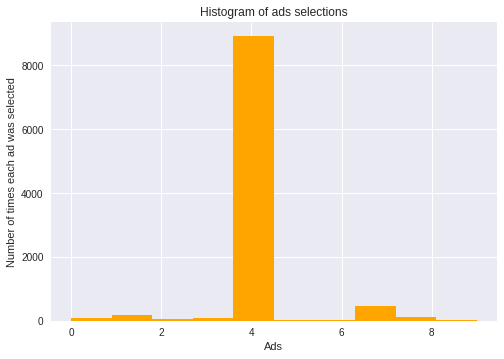

In [0]:
# Visualising the results

plt.hist(ads_selected, color = 'orange')
plt.title('Histogram of ads selections')
plt.xlabel('Ads')
plt.ylabel('Number of times each ad was selected')